# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [63]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

### Understanding the structure of the data
I'm doing the project locally on my computer

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [4]:
shape = df.shape 
print(f'There are {shape[0]} rows and {shape[1]} colums in this dataset')

There are 1898 rows and 9 colums in this dataset


#### Observations:
There are 1898 rows and 9 colums in this dataset

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
order_id and customer_id are unique numbers to identify customers and restaurants. cuisine_type and day_of_the_week are categorical with day_of_the_week being binary. cost_of_the_order, food_preparation_time, and delivery_time are all continuous variables, but the values in food_preparation_time and delivery_time are whole numbers. Ratings would appear to be ordinal but it only has the values of 5, 4, 3 and 'Not Given'. Perhaps Not Given can be mapped to 2.  


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [22]:
for col in df.columns:
    nans = df[col].isnull().sum()
    if nans:
        print(f'There are missing values for {col}')
    else:
        print(f'There are no missing values for {col}')

There are no missing values for order_id
There are no missing values for customer_id
There are no missing values for restaurant_name
There are no missing values for cuisine_type
There are no missing values for cost_of_the_order
There are no missing values for day_of_the_week
There are no missing values for rating
There are no missing values for food_preparation_time
There are no missing values for delivery_time


#### Observations:
There are no missing values in the data set. Although some might considered 'Not Given' in ratings to be a missing value. 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [183]:
_min = min(df['food_preparation_time'])
_max = max(df['food_preparation_time'])
avg = df['food_preparation_time'].mean()
print(df['food_preparation_time'].describe())
print(f'min: {_min}, max: {_max}, average: {round(avg,2)} time for food to be prepared')

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64
min: 20, max: 35, average: 27.37 time for food to be prepared


#### Observations:
The min, max, and average time for the food to be prepared in 20, 35 and 27.37 respectively. 

### **Question 5:** How many orders are not rated?

In [42]:
no_rating = len(df[df['rating'] == 'Not given'])
print(f'{no_rating} orders are not rated')

736 orders are not rated


#### Observations:
736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

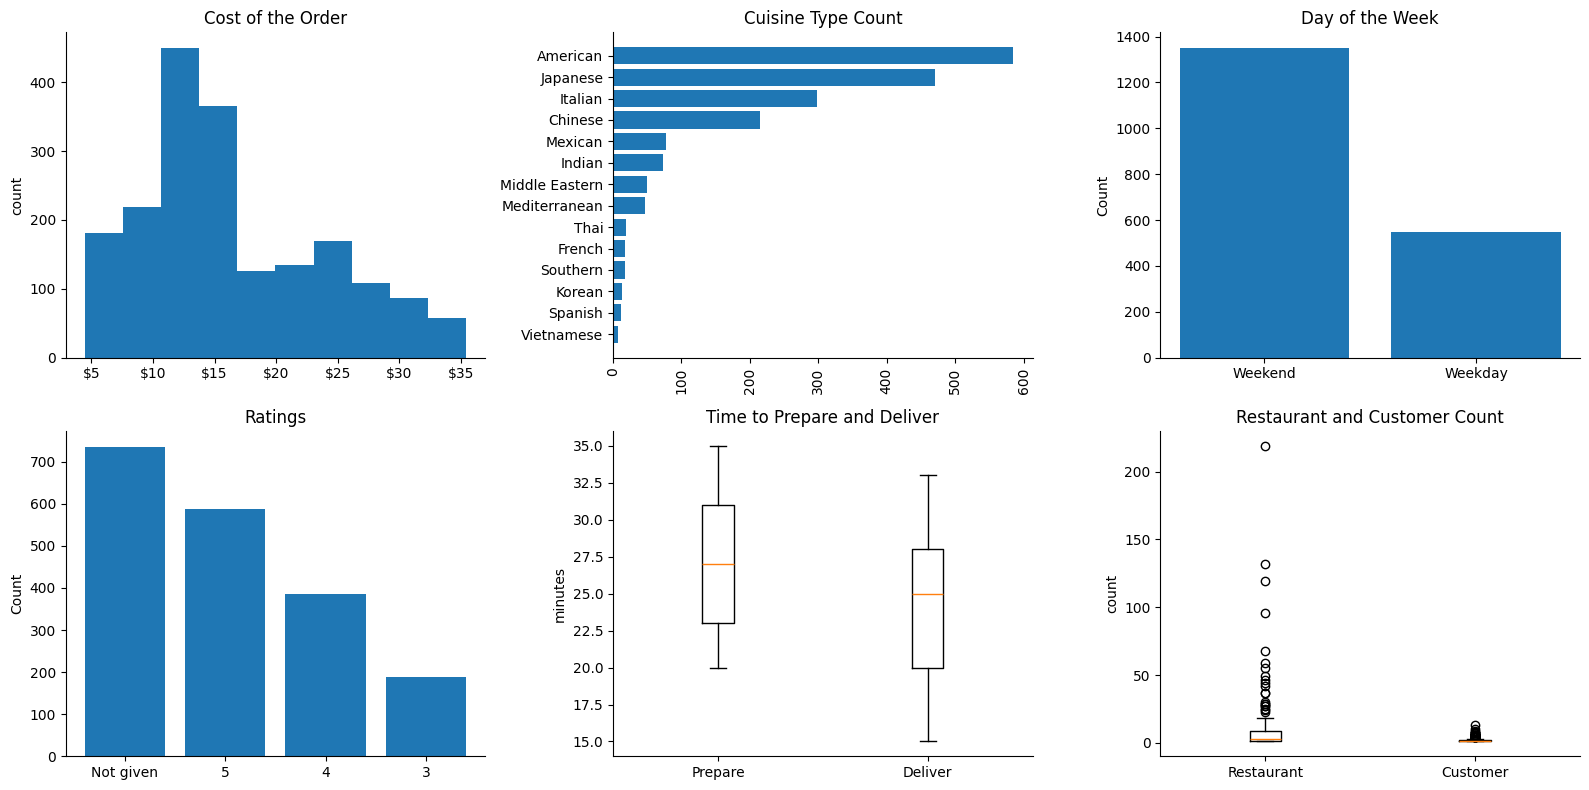

Most orders have no rating, are cuisine American and were ordered on the weekend.
50% of the orders take between 23 and 31 minutes to be preparedand between 20 and 28 minutes to be delivered.
Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken make up nearly 30% of orders


In [175]:
class Univariate:
    '''
    A class that helps to make 6 graphs 
    for univariate visualization
    '''
    def __init__(self, df):
        self.df = df 

    def remove_spines(self, ax):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    def add_hist_cost_of_order(self, ax):
        ax.hist(self.df['cost_of_the_order'])
        ax.set_title('Cost of the Order')
        ax.set_ylabel('count')
        ax.get_xaxis().set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
        self.remove_spines(ax)

    def add_cuisine_count(self, ax):
        categories = self.df['cuisine_type'].value_counts(ascending=True)
        y = categories.index 
        ax.barh(y=y, width=categories)
        ax.set_title('Cuisine Type Count')
        ax.tick_params(axis='x', labelrotation=90)
        self.remove_spines(ax)

    def add_bar_graph(self, ax, col, title):
        categories = self.df[col].value_counts()
        x = categories.index 
        ax.bar(x=x, height=categories)
        ax.set_ylabel('Count')
        ax.set_title(title)
        self.remove_spines(ax)

    def add_dual_box_plot(self, ax, data, labels, ylabel, title):
        ax.boxplot(data)
        ax.set_xticklabels(labels)
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        self.remove_spines(ax)

    def show_graphs(self):
        fig, axes = plt.subplots(2, 3, figsize=(16, 8))
        axes = axes.flatten()
        self.add_hist_cost_of_order(axes[0])
        self.add_cuisine_count(axes[1])
        self.add_bar_graph(axes[2], 'day_of_the_week', 'Day of the Week')
        self.add_bar_graph(axes[3], 'rating', 'Ratings')

        data = [df['food_preparation_time'], df['delivery_time']]
        labels = ['Prepare', 'Deliver']
        title = 'Time to Prepare and Deliver'
        self.add_dual_box_plot(axes[4], data, labels, 'minutes', title)

        data = [df['restaurant_name'].value_counts(), df['customer_id'].value_counts()]
        labels = ['Restaurant', 'Customer']
        title = 'Restaurant and Customer Count'
        self.add_dual_box_plot(axes[5], data, labels, 'count', title)
        
        plt.tight_layout()
        plt.show()

def get_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    return f'{round(q1)} and {round(q3)}'

top_four = df['restaurant_name'].value_counts()[:4]
top_four_names = top_four.index 
top_four_names = ', '.join(top_four_names[:-1]) + ' and ' + top_four_names[-1]
percent = round(sum(top_four) / len(df) * 100 )

Univariate(df).show_graphs()


print('Most orders have no rating, are cuisine American and were ordered on the weekend.')
print(f"50% of the orders take between {get_iqr(df['food_preparation_time'])} minutes to be prepared\
and between {get_iqr(df['delivery_time'])} minutes to be delivered.")
print(f'{top_four_names} make up nearly {percent}% of orders')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [186]:
top_5 = df['restaurant_name'].value_counts()[:5]
names_list = ', '.join(top_5.index[:-1]) + ' and ' + top_5.index[-1]
percent = round(sum(top_5) / len(df) * 100)
print(f'{names_list} received the most orders and make up about {percent}% of the orders.')

Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm received the most orders and make up about 33% of the orders.


#### Observations:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm received the most orders and make up about 33% of the orders.

### **Question 8**: Which is the most popular cuisine on weekends?

In [182]:
weekend_df = df[df['day_of_the_week'] == 'Weekend']
most_popular_cuisine = weekend_df['cuisine_type'].value_counts().index[0]
print(f'{most_popular_cuisine} is the most popular cuisine on the weekends')

American is the most popular cuisine on the weekends


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [192]:
total_amount = df['cost_of_the_order'].sum()
over_20 = df[df['cost_of_the_order'] > 20]
over_20_amount = over_20['cost_of_the_order'].sum()
percent_amount = round(over_20_amount / total_amount * 100)
percent_orders = round(len(over_20) / len(df) * 100)
print(f'Nearly {percent_orders}% of the of the orders cost more than 20 dollars')
print(f'Which makes up for nearly {percent_amount}% of the amount spend in the data set')


Nearly 29% of the of the orders cost more than 20 dollars
Which makes up for nearly 47% of the amount spend in the data set


#### Observations:
Nearly 29% of the of the orders cost more than 20 dollars. 

Which makes up for nearly 47% of the amount spend in the data set


### **Question 10**: What is the mean order delivery time?

In [195]:
df.head()
mean = round(df['delivery_time'].mean(), 2)
std = round(df['delivery_time'].std(), 2)
print(f'The mean delivery time is {mean} with a standard deviation of {std}')

The mean delivery time is 24.16 with a standard deviation of 4.97


#### Observations:
The mean delivery time is 24.16 with a standard deviation of 4.97

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [220]:
top_3_customers = df['customer_id'].value_counts()[:3]
top_ids = top_3_customers.index
top_ids = [str(x) for x in top_ids]
top_ids = ', '.join(top_ids[:2]) + ' and ' + top_ids[2]
one, two, three, total = list(top_3_customers) + [top_3_customers.sum()]
print(f'The top 3 customer ids are: {top_ids}')
print(f'They placed {one}, {two} and {three} orders respectively. With a combined total of {total}.')

The top 3 customer ids are: 52832, 47440 and 83287
They placed 13, 10 and 9 orders respectively. With a combined total of 32.


#### Observations:
The top 3 customer ids are: 52832, 47440 and 83287

They placed 13, 10 and 9 orders respectively. With a combined total of 32.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

C:\Users\jesse\AppData\Local\Temp\ipykernel_21220\3958976141.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels)
C:\Users\jesse\AppData\Local\Temp\ipykernel_21220\3958976141.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_label)


show cuisine type and food prep
show cuisine type and cost
restaurant and prices
cost and preparation
restaurant and delivery
restaurant and delivery
weekend and cost
restaurant and rating
cuisine and rating


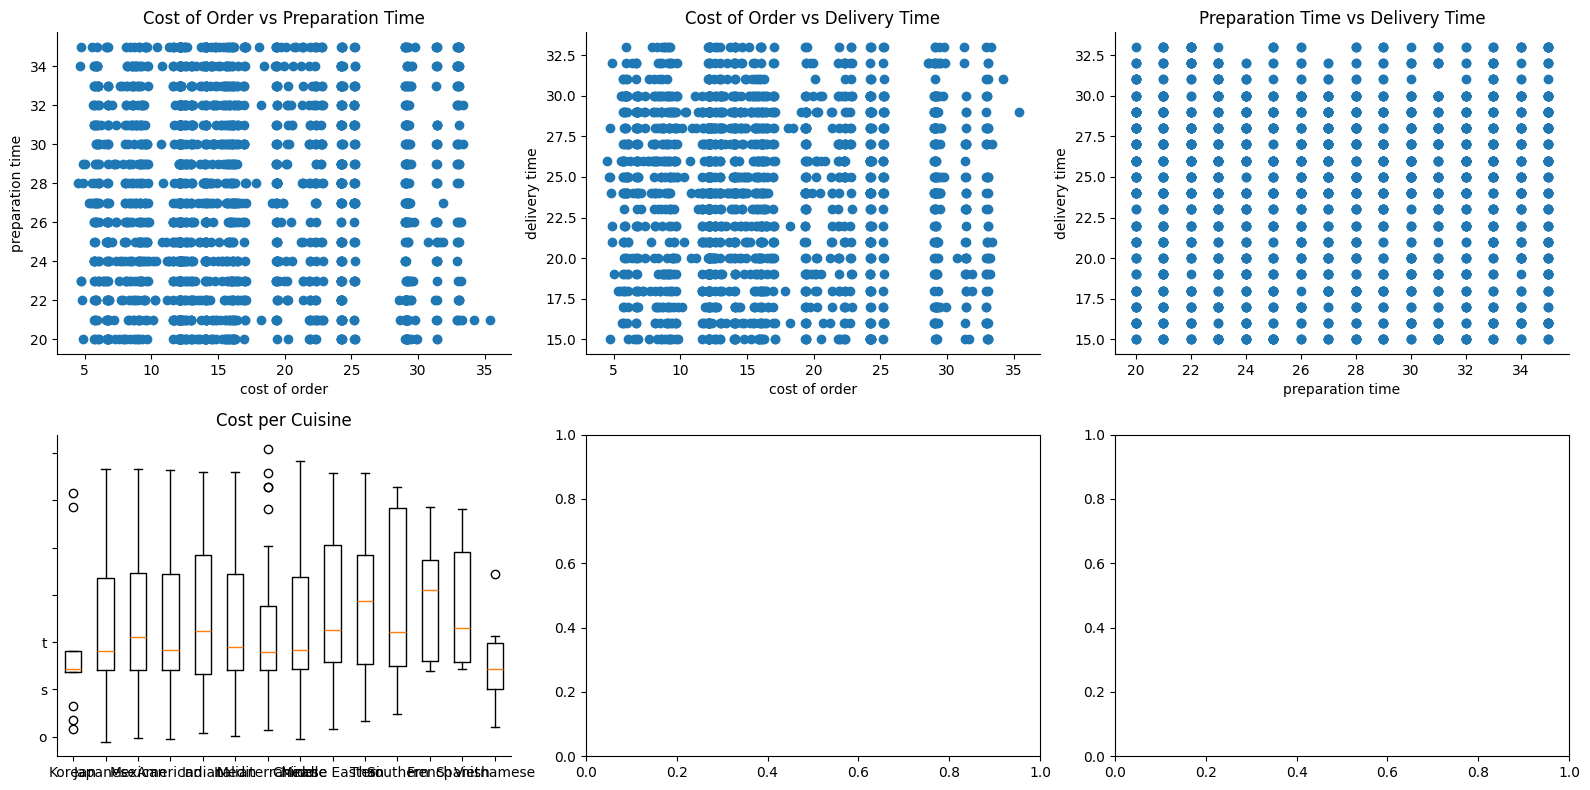

In [243]:
class Multivariate:
    def __init__(self, df):
        self.df = df 

    def remove_spines(self, ax):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    def make_scatter(self, ax, data, labels, title):
        ax.scatter(x=data[0], y=data[1])
        ax.set_xlabel(labels[0])
        ax.set_ylabel(labels[1])
        ax.set_title(title)
        self.remove_spines(ax)

    def make_box_plots(self, ax, data, labels, y_label, title):
        ax.boxplot(data, labels=labels)
        ax.set_yticklabels(y_label)
        ax.set_title(title)
        self.remove_spines(ax)

    def show_graphs(self):
        fig, axes = plt.subplots(2, 3, figsize=(16, 8))
        axes = axes.flatten()
        data = [df['cost_of_the_order'], df['food_preparation_time']]
        labels = ['cost of order', 'preparation time']
        self.make_scatter(axes[0], data, labels, 'Cost of Order vs Preparation Time')

        data = [df['cost_of_the_order'], df['delivery_time']]
        labels = ['cost of order', 'delivery time']
        self.make_scatter(axes[1], data, labels, 'Cost of Order vs Delivery Time')

        data = [df['food_preparation_time'], df['delivery_time']]
        labels = ['preparation time', 'delivery time']
        self.make_scatter(axes[2], data, labels, 'Preparation Time vs Delivery Time')

        cuisines = df['cuisine_type'].unique()
        data = [df[df['cuisine_type'] == cuisine]['cost_of_the_order'] for cuisine in cuisines]
        self.make_box_plots(axes[3], data, cuisines, 'cost', 'Cost per Cuisine')
        print('show cuisine type and food prep')
        print('show cuisine type and cost')
        print('restaurant and prices')
        print('cost and preparation')
        print('restaurant and delivery')
        print('restaurant and delivery')
        print('weekend and cost')
        print('restaurant and rating')
        print('cuisine and rating')

        plt.tight_layout()
        plt.show()

Multivariate(df).show_graphs()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  

### Recommendations:

*  

---